# Resolução de Poligonais
Neste notebook vamos fazer um programa capaz de resolver uma poligonal topográfica fechada.

In [43]:
# Passo 0 Dados de entrada

Az01= 255.2                           #Azimute inicial
Ang=[246.79028,261.4928,301.75306,148.47528,301.48417]  #Angulos externos a direita medidos
D=[100.18,115.80,116.68,91.65,89.06]                #Distancias entre os pontos medidos
Coord=[0,0]                 #Coordenadas do ponto inicial


In [44]:
# Passo 1 Calculo angular
soma=0
for item in Ang:                    #Laço de repetição para calcular o somatório dos ângulos
    soma=soma+item
Eang=soma-(len(Ang)+2)*180          # Calculo do erro angular

for item in Ang:                    # Laço de repetição para distribuir as correções angulares
  Ang[Ang.index(item)]=item-Eang/len(Ang)
print(Ang)
import numpy as np
Ang1=np.array(Ang)
print(np.around(Ang1,3))                      # Impressão dos ângulos corrigidos

[246.79116199999999, 261.493682, 301.753942, 148.476162, 301.485052]
[246.791 261.494 301.754 148.476 301.485]


In [45]:
# Passo 2 Calculo do Azimute
Az=[Az01]
aux=Az01
for item in Ang:                        # Laço de repetição para calcular os azimutes
    if aux+item-180<0:                  # Estrutura de decisão para deixar os angulos entre
      Az.append(aux+item-180+360)       # os valores de 0-360
      aux=aux+item-180+360
    elif aux+item-180>360:
      Az.append(aux+item-180-360)
      aux=aux+item-180-360
    else:
      Az.append(aux+item-180)
      aux=aux+item-180
Az.pop(-1)  # remove o ultimo Azimute da lista
print(Az)
# se o azimute final der igual ao azimute inicial está certo!

[255.2, 321.991162, 43.48484399999995, 165.23878599999995, 133.71494799999994]


In [46]:
# Passo 3 Calculo das Coordenadas

In [47]:
import math
def calcular_coordenadas(azimutes, distancias,Coord):
    coordenadas = [(Coord[0],Coord[1])]  # Coordenadas do ponto inicial
    azimutes = [math.radians(a) for a in azimutes]  # Converte os azimutes para radianos
    for i in range(len(distancias)):
        x = coordenadas[i][0] + distancias[i] * math.sin(azimutes[i])
        y = coordenadas[i][1] + distancias[i] * math.cos(azimutes[i])
        coordenadas.append((x, y))
    return coordenadas
coordenadas=calcular_coordenadas(Az,D,Coord)
Dx=coordenadas[len(coordenadas)-1][0]-coordenadas[0][0]
Dy=coordenadas[len(coordenadas)-1][1]-coordenadas[0][1]
print(Dx,Dy)

-0.14620603806500299 0.13604009518853388


In [48]:
print(coordenadas[-1][0])
print(coordenadas)

-0.14620603806500299
[(0, 0), (-96.85636707039475, -25.590556030007505), (-168.16404083185097, 65.6500909576686), (-87.86922002249602, 150.30801528370898), (-64.51760519148063, 61.68282369134117), (-0.14620603806500299, 0.13604009518853388)]


In [49]:
# Passo 4 Calculo das Coordenadas corrigidas

In [50]:
distTot=0
for item in D:
    distTot=distTot+item
print(distTot)
def calcular_coordenadas(azimutes, distancias,Coord):
    coordenadas = [(Coord[0],Coord[1])]  # Coordenadas do ponto inicial
    azimutes = [math.radians(a) for a in azimutes]  # Converte os azimutes para radianos
    for i in range(len(distancias)):
        x = coordenadas[i][0] + distancias[i] * math.sin(azimutes[i])-(Dx*distancias[i]/distTot)
        y = coordenadas[i][1] + distancias[i] * math.cos(azimutes[i])-(Dy*distancias[i]/distTot)
        coordenadas.append((x, y))
    return coordenadas
coordenadas=calcular_coordenadas(Az,D,Coord)
Dx=coordenadas[len(coordenadas)-1][0]-coordenadas[0][0]
Dy=coordenadas[len(coordenadas)-1][1]-coordenadas[0][1]
print(Dx,Dy)

513.3700000000001
-6.331740687315346e-15 -1.0717121634584714e-14


In [51]:
# Passo 5 Apresentação do Resultado

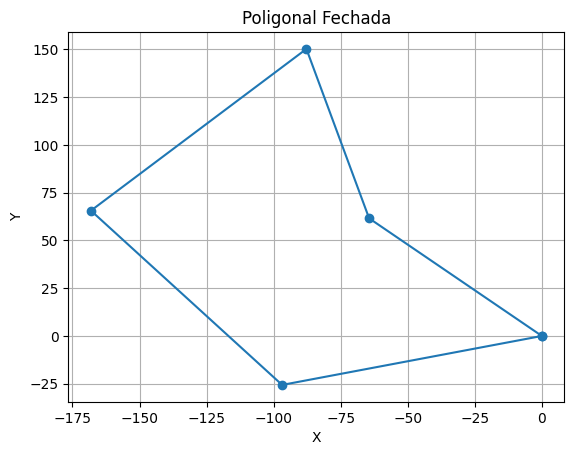

In [52]:
import matplotlib.pyplot as plt

x = [c[0] for c in coordenadas]
y = [c[1] for c in coordenadas]

plt.plot(x, y, '-o')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Poligonal Fechada")
plt.grid(True)
plt.show()

In [53]:
print(coordenadas)

[(0, 0), (-96.8278361455387, -25.617103153399967), (-168.10253045901797, 65.59285750078794), (-87.77447958066517, 150.21986229840516), (-64.39676313991673, 61.57038398354864), (-6.331740687315346e-15, -1.0717121634584714e-14)]
